In [44]:
import pandas as pd

df=pd.read_csv(r'C:\Users\f\Desktop\F\colégio\Pós-Graduação em Ciência de Dados\Módulo II\Regressão e Séries Temporais\Atividades\dados_regressao.csv')
df

,sexo,idade,experiencia,escolaridade,salario
0,Homem,49,33,12,76058.935879
1,Homem,49,33,9,75116.620159
2,Homem,44,11,8,52445.074167
3,Mulher,35,36,19,56891.606445
4,Homem,43,10,11,47646.556098
...,...,...,...,...,...
195,Homem,25,28,17,58237.358911
196,Homem,35,6,16,37909.002304
197,Mulher,34,9,10,49687.356581
198,Homem,38,33,20,59944.807820


In [45]:
df.describe()

,idade,experiencia,escolaridade,salario
count,200.000000,200.000000,200.000000,200.000000
mean,40.380000,20.210000,14.065000,56324.441292
std,11.349434,11.814985,3.593794,11484.491146
min,20.000000,1.000000,8.000000,33290.318037
25%,31.000000,9.000000,11.000000,47972.723059
50%,41.000000,20.000000,14.000000,56821.152998
75%,49.000000,30.250000,17.000000,63312.406635
max,60.000000,40.000000,20.000000,88894.113282


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sexo          200 non-null    object 
 1   idade         200 non-null    int64  
 2   experiencia   200 non-null    int64  
 3   escolaridade  200 non-null    int64  
 4   salario       200 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


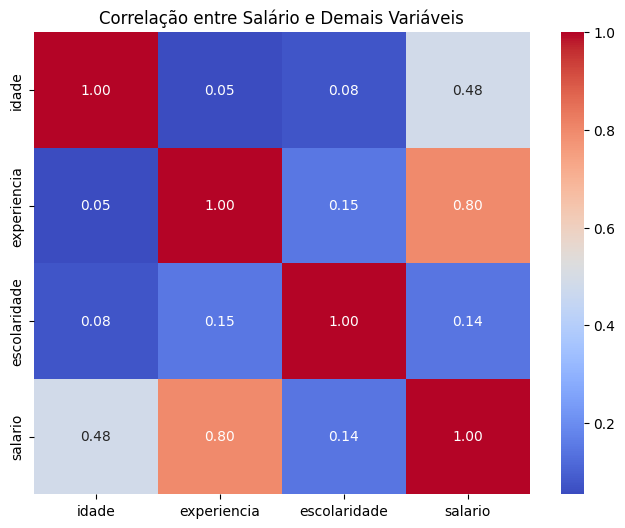

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacao = df[['idade','experiencia', 'escolaridade', 'salario']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlação entre Salário e Demais Variáveis')
plt.show()

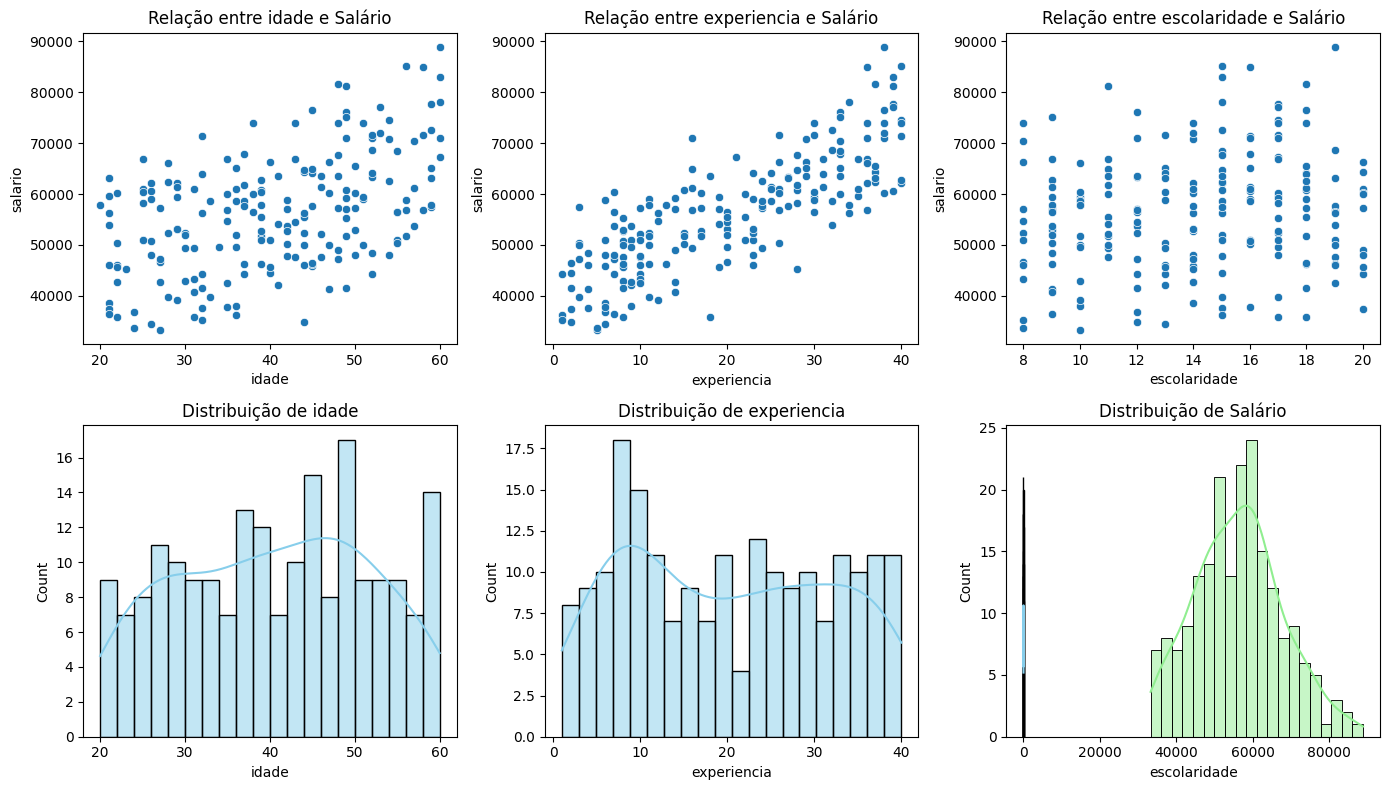

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Definindo as variáveis para análise
variaveis = ['idade', 'experiencia', 'escolaridade']

# Criando subgráficos para visualizar a relação entre salário e as variáveis
plt.figure(figsize=(14, 8))

# Gráficos de dispersão entre as variáveis e o salário
for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df['salario'])
    plt.title(f'Relação entre {var} e Salário')

# Distribuições de cada variável
for i, var in enumerate(variaveis, 4):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {var}')

# Distribuição do salário
plt.subplot(2, 3, 6)
sns.histplot(df['salario'], kde=True, bins=20, color='lightgreen')
plt.title('Distribuição de Salário')

plt.tight_layout()
plt.show()


Idade e Experiência possuem maior correlação com salário, enquanto Escolaridade tem correlação fraca

C:\Users\f\AppData\Local\Temp\ipykernel_17212\4152615928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo', y='salario', data=df, palette='pastel')


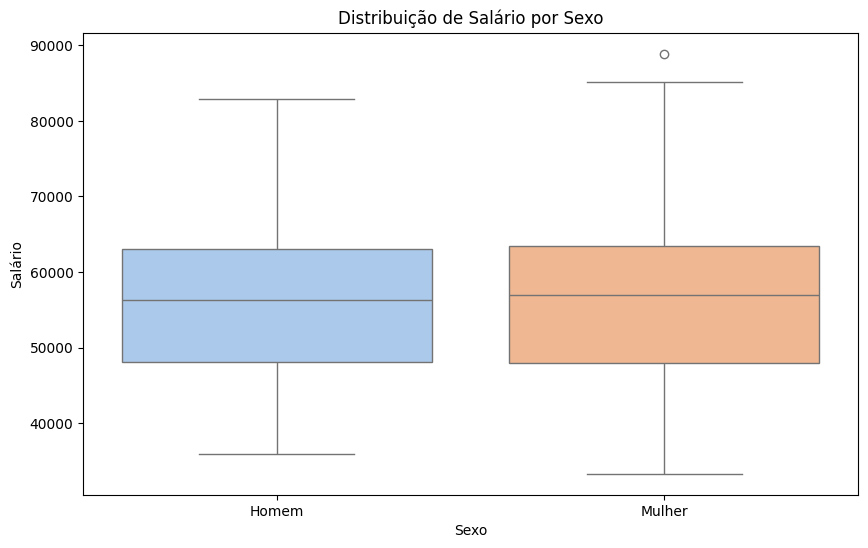

In [49]:
plt.figure(figsize=(10, 6))

# Usando boxplot para visualizar a distribuição de salário por sexo
sns.boxplot(x='sexo', y='salario', data=df, palette='pastel')
plt.title('Distribuição de Salário por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Salário')
plt.show()

homem e mulher possuem mediana e distribuição de quartis parecidos, Mulher possui maior dispersão com alguns outliers.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#escolhendo a variável dependente e independente
X = df[['experiencia']]
y = df['salario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)  # EQM
mae = mean_absolute_error(y_test, y_pred)  # MAE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE (%)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")
print(f"R²: {r2:.4f}")
print(f"Coeficiente (experiencia): {modelo.coef_}")
print(f"Intercept: {modelo.intercept_}")


Erro Quadrático Médio (MSE): 64034619.93
Erro Absoluto Médio (MAE): 6356.45
Erro Percentual Absoluto Médio (MAPE): 11.23%
R²: 0.4539
Coeficiente (experiencia): [798.71545853]
Intercept: 39985.79630305826


O coeficiente angular representa a inclinação da reta (tangente), quanto maior, mais inclinada será a reta

O intercepto é o coeficiente angular, é indicado pelo valor que a reta corta o eixo y quando x=0

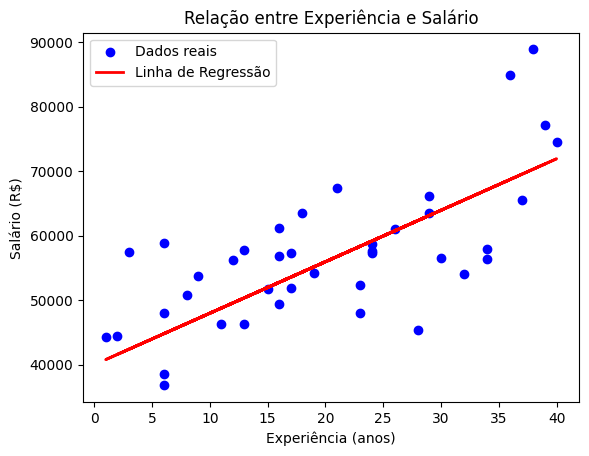

In [51]:
import matplotlib.pyplot as plt

# Plotando os dados reais (scatter plot)
plt.scatter(X_test, y_test, color='blue', label='Dados reais')

# Plotando a linha de regressão (predições)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')

plt.title('Relação entre Experiência e Salário')
plt.xlabel('Experiência (anos)')
plt.ylabel('Salário (R$)')
plt.legend()

plt.show()


O erro associada é relativamente alto, o que indica que a abordagem escolhida não é a mais apropriada, possivelmente por causa de outliers e pelo fato da experiência não explicar completamente a variável alvo

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Separando os dados por gênero
df_homens = df[df['sexo'] == 'Homem']
df_mulheres = df[df['sexo'] == 'Mulher']

X_homens = df_homens[['experiencia']]
y_homens = df_homens['salario']

X_mulheres = df_mulheres[['experiencia']]
y_mulheres = df_mulheres['salario']

X_homens_train, X_homens_test, y_homens_train, y_homens_test = train_test_split(X_homens, y_homens, test_size=0.2, random_state=42)
X_mulheres_train, X_mulheres_test, y_mulheres_train, y_mulheres_test = train_test_split(X_mulheres, y_mulheres, test_size=0.2, random_state=42)

modelo_homens = LinearRegression()
modelo_mulheres = LinearRegression()

# Treinando os modelos
modelo_homens.fit(X_homens_train, y_homens_train)
modelo_mulheres.fit(X_mulheres_train, y_mulheres_train)

y_homens_pred = modelo_homens.predict(X_homens_test)
y_mulheres_pred = modelo_mulheres.predict(X_mulheres_test)

print(f"Coeficiente do modelo para Homens: {modelo_homens.coef_}")
print(f"Coeficiente do modelo para Mulheres: {modelo_mulheres.coef_}")


Coeficiente do modelo para Homens: [726.54741458]
Coeficiente do modelo para Mulheres: [781.47291795]


In [ ]:
# Função para calcular o MAPE (Erro Percentual Absoluto Médio)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculando os erros para o modelo de Homens
eqm_homens = mean_squared_error(y_homens_test, y_homens_pred)
mae_homens = mean_absolute_error(y_homens_test, y_homens_pred)
mape_homens = mean_absolute_percentage_error(y_homens_test, y_homens_pred)

# Calculando os erros para o modelo de Mulheres
eqm_mulheres = mean_squared_error(y_mulheres_test, y_mulheres_pred)
mae_mulheres = mean_absolute_error(y_mulheres_test, y_mulheres_pred)
mape_mulheres = mean_absolute_percentage_error(y_mulheres_test, y_mulheres_pred)

print(f"Erro Quadrático Médio (MSE) para Homens: {eqm_homens}")
print(f"Erro Quadrático Médio (MSE) para Mulheres: {eqm_mulheres}")

print(f"Erro Absoluto Médio (MAE) para Homens: {mae_homens}")
print(f"Erro Absoluto Médio (MAE) para Mulheres: {mae_mulheres}")

print(f"Erro Percentual Absoluto Médio (MAPE) para Homens: {mape_homens}%")
print(f"Erro Percentual Absoluto Médio (MAPE) para Mulheres: {mape_mulheres}%")


Erro Quadrático Médio (MSE) para Homens: 59572126.39801985
Erro Quadrático Médio (MSE) para Mulheres: 61193768.8861146
Erro Absoluto Médio (MAE) para Homens: 6345.376733231308
Erro Absoluto Médio (MAE) para Mulheres: 5635.219710630238
Erro Percentual Absoluto Médio (MAPE) para Homens: 12.048436665284536%
Erro Percentual Absoluto Médio (MAPE) para Mulheres: 8.778768792198754%


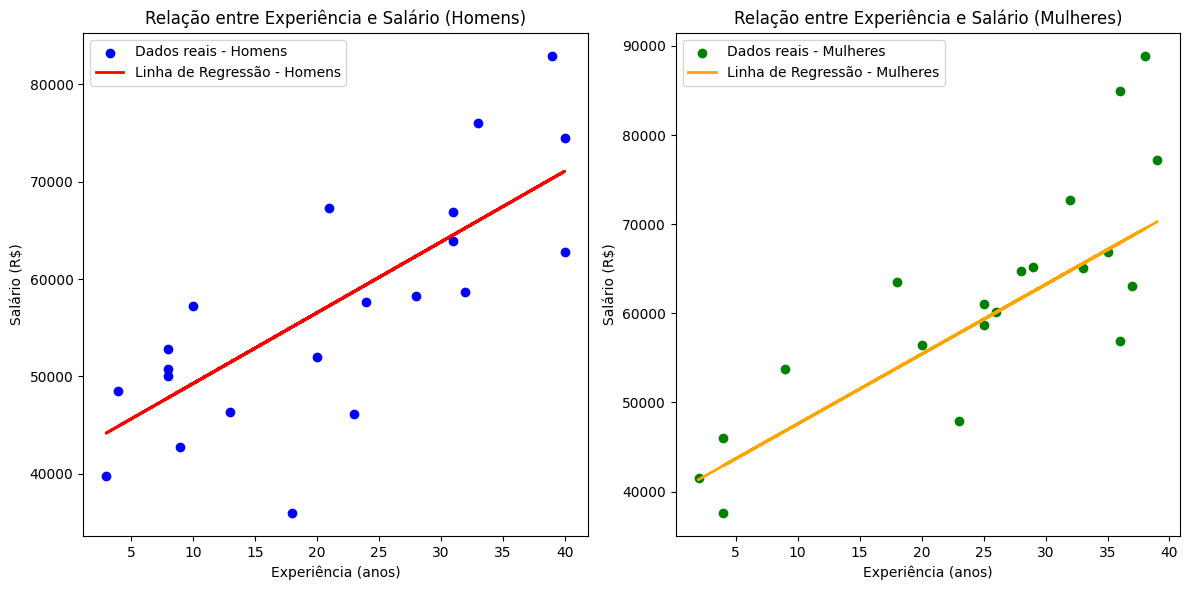

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# plot para Homens
plt.subplot(1, 2, 1)
plt.scatter(X_homens_test, y_homens_test, color='blue', label='Dados reais - Homens')
plt.plot(X_homens_test, y_homens_pred, color='red', linewidth=2, label='Linha de Regressão - Homens')
plt.title('Relação entre Experiência e Salário (Homens)')
plt.xlabel('Experiência (anos)')
plt.ylabel('Salário (R$)')
plt.legend()

#plot para Mulheres
plt.subplot(1, 2, 2)
plt.scatter(X_mulheres_test, y_mulheres_test, color='green', label='Dados reais - Mulheres')
plt.plot(X_mulheres_test, y_mulheres_pred, color='orange', linewidth=2, label='Linha de Regressão - Mulheres')
plt.title('Relação entre Experiência e Salário (Mulheres)')
plt.xlabel('Experiência (anos)')
plt.ylabel('Salário (R$)')
plt.legend()

plt.tight_layout()
plt.show()


Embora o conjunto de dados de mulheres possua mais outliers, o erro para mulheres é menor comparado ao erro para homens.

Experiência consegue explicar de maneira razoável a variavel alvo, com erro entre 8~12%, mas com MSE alto.

O coeficiente angular para mulheres é ligeiramente maior que para homens, indicando maior relação entre experiência e salário para mulheres, ou seja, de acordo com o conjunto de dados, mulheres possuem maior aumento de salário a medida que adquirem mais experiência quando comparado aos homens.

Uma maneira de abordar melhor o problema seria tratar os dados (outliers, normalizar, etc...) e considerar uma regressão linear multipla, levando em consideração as outras variáveis independentes.

In [55]:
# Utilizando One-Hot Encoding
df = pd.get_dummies(df, columns=['sexo'], drop_first=True)

print(df.columns)


Index(['idade', 'experiencia', 'escolaridade', 'salario', 'sexo_Mulher'], dtype='object')


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df[['idade', 'experiencia', 'escolaridade', 'sexo_Mulher']]
y = df['salario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  
mae = mean_absolute_error(y_test, y_pred)  
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")
print(f"R²: {r2:.4f}")
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")


Erro Quadrático Médio (MSE): 23034013.78
Erro Absoluto Médio (MAE): 3800.00
Erro Percentual Absoluto Médio (MAPE): 6.62%
R²: 0.8036
Coeficientes: [  436.1155037    765.90005106   -17.80351769 -1500.60729589]
Intercepto: 24128.914399196474


Utilizando todas as variáveis já traz um resultado consideravelmente melhor.